In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
print(os.listdir("../input"))

['rock-paper-scissors-dataset']


In [2]:
rock_dir = os.path.join('../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train/rock')
paper_dir = os.path.join('../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train/paper')
scissors_dir = os.path.join('../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train/scissors')

In [3]:
print('Total training rock images:', len(os.listdir(rock_dir)))
print('Total training paper images:', len(os.listdir(paper_dir)))
print('Total training scissors images:', len(os.listdir(scissors_dir)))

Total training rock images: 840
Total training paper images: 840
Total training scissors images: 840


In [4]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock02-064.png', 'rock06ck02-000.png', 'rock03-104.png', 'rock04-114.png', 'rock04-104.png', 'rock01-010.png', 'rock01-049.png', 'rock04-042.png', 'rock01-090.png', 'rock06ck02-053.png']
['paper06-027.png', 'paper04-054.png', 'paper07-011.png', 'paper04-041.png', 'paper06-019.png', 'paper04-104.png', 'paper06-100.png', 'paper04-032.png', 'paper06-073.png', 'paper06-013.png']
['scissors04-102.png', 'scissors04-041.png', 'scissors03-099.png', 'testscissors02-096.png', 'testscissors01-116.png', 'testscissors03-107.png', 'testscissors03-021.png', 'scissors01-047.png', 'testscissors03-089.png', 'scissors03-115.png']


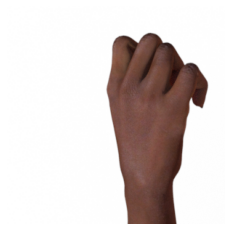

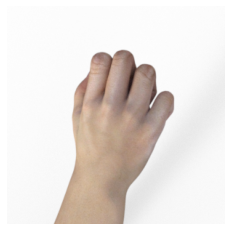

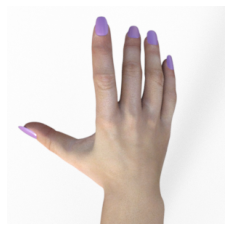

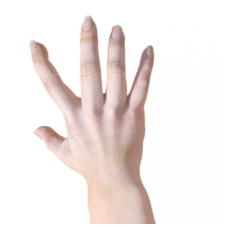

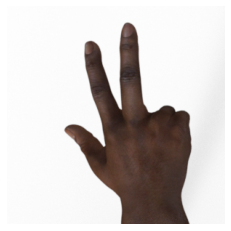

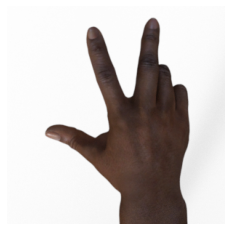

In [5]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [6]:
TRAINING_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
history = model.fit_generator(train_generator, epochs=20, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/20
79/79 [==============================] - 113s 1s/step - loss: 1.2105 - accuracy: 0.4139 - val_loss: 0.8323 - val_accuracy: 0.5941
Epoch 2/20
79/79 [==============================] - 109s 1s/step - loss: 0.8131 - accuracy: 0.6361 - val_loss: 0.3086 - val_accuracy: 0.9624
Epoch 3/20
79/79 [==============================] - 108s 1s/step - loss: 0.5390 - accuracy: 0.7714 - val_loss: 0.1816 - val_accuracy: 0.9409
Epoch 4/20
79/79 [==============================] - 108s 1s/step - loss: 0.3438 - accuracy: 0.8690 - val_loss: 0.0692 - val_accuracy: 0.9704
Epoch 5/20
79/79 [==============================] - 117s 1s/step - loss: 0.2666 - accuracy: 0.8940 - val_loss: 0.1008 - val_accuracy: 0.9543
Epoch 6/20
79/79 [==============================] - 112s 1s/step - loss: 0.2179 - accuracy: 0.9123 - val_loss: 0.1135 - val_accuracy: 0.9651
Epoch 7/20
79/79 [==============================] - 107s 1s/step - loss: 0.1878 - accuracy: 0.9405 - val_loss: 0.1012 - val_accuracy: 0.9462
Epoch 8/20
79

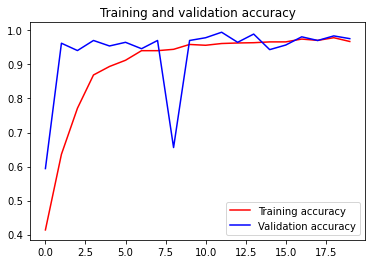

<Figure size 432x288 with 0 Axes>

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [16]:
validation_dir = os.path.join('../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation')
validation_files  = os.listdir(validation_dir)
print(validation_files[:10])

['paper4.png', 'scissors-hires1.png', 'paper2.png', 'paper5.png', 'scissors1.png', 'scissors5.png', 'paper8.png', 'rock4.png', 'paper-hires1.png', 'rock2.png']


In [18]:
images = []
img_folder = os.path.join('../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation')
img_files = os.listdir(img_folder)[:10]
img_files = [os.path.join(img_folder, f) for f in img_files]
# print(img_files)
for img in img_files:
    img = load_img(img, target_size=(150, 150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
# print(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

SyntaxError: invalid syntax (<ipython-input-18-908a170662d9>, line 3)